<a href="https://colab.research.google.com/github/navicester/GAN-ex/blob/master/%E7%8E%A9%E8%BD%ACFace_Stylor%E4%BA%BA%E8%84%B8%E9%A3%8E%E6%A0%BC%E8%BF%81%E7%A7%BB%EF%BC%8C%E6%89%8B%E6%9C%BA%E8%87%AA%E6%8B%8D%E7%A7%92%E5%8F%98%E7%88%86%E6%AC%BE%E8%89%BA%E6%9C%AF%E5%A4%B4%E5%83%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 玩转Face Stylor人脸风格迁移，手机自拍秒变爆款艺术头像！
视频讲解：同济子豪兄 https://space.bilibili.com/1900783

2022-02-24


OpenMMLab开源计算机视觉算法库内推，简历发hr@openmmlab.com

简历命名：张三-岗位（前后端测试/算法/运营/产品）-身份（实习/校招/社招）-同济子豪兄内推

# 配置环境

## 安装配置CUDA环境

In [1]:
# 查看当前CUDA版本
!nvcc -V

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


In [2]:
# 查看系统中所有CUDA版本
!ls /usr/local/

bin	   cuda-10.1  cuda-11.1  _gcs_config_ops.so  licensing	share
cuda	   cuda-11    etc	 include	     man	src
cuda-10.0  cuda-11.0  games	 lib		     sbin	xgboost


In [3]:
# 删除colab原有的cuda目录
!rm -rf /usr/local/cuda

# 用cuda-10.1版本作为原cuda的软链接（快捷方式），后续代码中的所有/usr/local/cuda都自动指向了/usr/local/cuda-10.1
!ln -s /usr/local/cuda-10.1 /usr/local/cuda

In [4]:
# 查看当前CUDA版本，替换为了10.1版本
!nvcc -V

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [5]:
# 忽略烦人的红色提示
import warnings
warnings.filterwarnings("ignore")

## 安装Pytorch、MMCV

In [6]:
!pip install torch==1.6.0 torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 748.8 MB 18 kB/s 
     |████████████████████████████████| 21.0 MB 1.4 MB/s 
     |████████████████████████████████| 23.2 MB 1.3 MB/s 
     |████████████████████████████████| 23.3 MB 1.3 MB/s 
     |████████████████████████████████| 23.3 MB 1.3 MB/s 
     |████████████████████████████████| 22.1 MB 1.2 MB/s 
     |████████████████████████████████| 22.1 MB 1.3 MB/s 
     |████████████████████████████████| 17.4 MB 795 kB/s 
     |████████████████████████████████| 17.3 MB 55.9 MB/s 
     |████████████████████████████████| 12.8 MB 18 kB/s 
     |████████████████████████████████| 12.7 MB 51.5 MB/s 
     |████████████████████████████████| 11.8 MB 50.1 MB/s 
     |████████████████████████████████| 5.9 MB 30.1 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.11.0+cu113
    Uninstalling torch-1.11.0+cu113:
      Successfully uninsta

In [7]:
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu101/torch1.6.0/index.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu101/torch1.6.0/index.html
     |████████████████████████████████| 39.5 MB 6.2 MB/s 
     |████████████████████████████████| 190 kB 22.6 MB/s 


In [8]:
!pip install wget dlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=ae887d5637d7901b4271d48656a9fe69eab9c4d03b4fd2175a17ca7298e03594
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


## 下载安装mmgeneration

In [9]:
!git clone https://github.com/open-mmlab/mmgeneration.git
%cd mmgeneration
!pip install -r requirements.txt
!pip install -v -e .
%cd ..

Cloning into 'mmgeneration'...
remote: Enumerating objects: 5050, done.
remote: Counting objects: 100% (2333/2333), done.
remote: Compressing objects: 100% (824/824), done.
remote: Total 5050 (delta 1849), reused 1593 (delta 1508), pack-reused 2717
Receiving objects: 100% (5050/5050), 2.58 MiB | 25.67 MiB/s, done.
Resolving deltas: 100% (3484/3484), done.
/content/mmgeneration
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 577 kB 34.1 MB/s 
     |████████████████████████████████| 108 kB 72.9 MB/s 
     |████████████████████████████████| 64 kB 3.4 MB/s 
     |████████████████████████████████| 45 kB 4.0 MB/s 
     |████████████████████████████████| 42 kB 1.3 MB/s 
     |████████████████████████████████| 69 kB 6.9 MB/s 
     |████████████████████████████████| 42 kB 1.2 MB/s 
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 4.11.4
    Uninstalling import

# 下载、安装配置MMGEN-FaceStylor

In [10]:
!git clone https://github.com/open-mmlab/MMGEN-FaceStylor.git
%cd MMGEN-FaceStylor
!pip install -r requirements.txt
%cd ..

Cloning into 'MMGEN-FaceStylor'...
remote: Enumerating objects: 227, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 227 (delta 22), reused 21 (delta 10), pack-reused 172
Receiving objects: 100% (227/227), 3.91 MiB | 42.11 MiB/s, done.
Resolving deltas: 100% (92/92), done.
/content/MMGEN-FaceStylor
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/content


## 配置目录结构

In [11]:
%cd MMGEN-FaceStylor
!ls

/content/MMGEN-FaceStylor
agilegan  configs  LICENSE	README_CN.md  requirements.txt	tools
apps	  demo	   LICENSES.md	README.md     setup.cfg


In [12]:
# 配置目录结构
!mkdir data
!mkdir work_dirs
!mkdir work_dirs/experiments
!mkdir work_dirs/pre-trained

## 下载预训练权重

In [13]:
# 在data目录，下载人脸关键点模型
%cd data

# !wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1AavRxpZJYeCrAOghgtthYqVB06y9QJd3'

!wget --no-check-certificate https://github.com/JeffTrain/selfie/raw/master/shape_predictor_68_face_landmarks.dat

%cd ..

/content/MMGEN-FaceStylor/data
--2022-06-11 08:29:39--  https://github.com/JeffTrain/selfie/raw/master/shape_predictor_68_face_landmarks.dat
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/JeffTrain/selfie/master/shape_predictor_68_face_landmarks.dat [following]
--2022-06-11 08:29:39--  https://raw.githubusercontent.com/JeffTrain/selfie/master/shape_predictor_68_face_landmarks.dat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99693937 (95M) [application/octet-stream]
Saving to: ‘shape_predictor_68_face_landmarks.dat’

shape_predictor_68_ 100%[===================>]  95.08M  99.6MB/s    in 1.0s 

In [14]:
# 在work_dirs/pretrained目录，下载风格迁移预训练模型
%cd work_dirs/pre-trained

!wget https://download.openmmlab.com/mmgen/stylegan2/stylegan2_c2_ffhq_1024_b4x8_20210407_150045-618c9024.pth

!wget https://download.openmmlab.com/mmgen/agilegan/agile_transfer_toonify1024x1024_zplus_lpips0.5_freezeD5_ada_bs4x2_lr_1e-4_1600iter_20211104_134449-cb6785b6.pth

/content/MMGEN-FaceStylor/work_dirs/pre-trained
--2022-06-11 08:29:45--  https://download.openmmlab.com/mmgen/stylegan2/stylegan2_c2_ffhq_1024_b4x8_20210407_150045-618c9024.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.252.96.28
Connecting to download.openmmlab.com (download.openmmlab.com)|47.252.96.28|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 381528574 (364M) [application/octet-stream]
Saving to: ‘stylegan2_c2_ffhq_1024_b4x8_20210407_150045-618c9024.pth’

stylegan2_c2_ffhq_1 100%[===================>] 363.85M  8.87MB/s    in 42s     

2022-06-11 08:30:28 (8.59 MB/s) - ‘stylegan2_c2_ffhq_1024_b4x8_20210407_150045-618c9024.pth’ saved [381528574/381528574]

--2022-06-11 08:30:28--  https://download.openmmlab.com/mmgen/agilegan/agile_transfer_toonify1024x1024_zplus_lpips0.5_freezeD5_ada_bs4x2_lr_1e-4_1600iter_20211104_134449-cb6785b6.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.252.96.28
Connecting to download.op

In [15]:
# 网速允许的话，下载其它风格迁移预训练模型
!wget https://download.openmmlab.com/mmgen/stylegan2/stylegan2_c2_ffhq_256_b4x8_20210407_160709-7890ae1f.pth

!wget https://download.openmmlab.com/mmgen/agilegan/agile_transfer_metfaces-oil1024x1024_zplus_lpips0.5_freezeD5_ada_bs4x2_lr_1e-4_1600iter_20211104_134350-2b99cb9b.pth

!wget https://download.openmmlab.com/mmgen/agilegan/agile_transfer_metfaces-sketch1024x1024_zplus_lpips0.5_freezeD5_ada_bs4x2_lr_1e-4_1600iter_20211104_134426-081af2a2.pth

!wget https://openmmlab-share.oss-cn-hangzhou.aliyuncs.com/mmgen/agilegan/agile_transfer_photo2cartoon256x256_zplus_lpips0.5_freezeD5_ada_bs4x2_lr_1e-4_800_iter_20211201_140719-062c09fa.pth

!wget https://download.openmmlab.com/mmgen/agilegan/agile_transfer_bitmoji256x256_z_wolpips_freezeD3_ada_bs4x2_lr_1e-4_iter_1600_20211202_195819-9010a9fe.pth

!wget https://download.openmmlab.com/mmgen/agilegan/agile_transfer_face2comics256x256_z_wolpips_freezeD3_ada_bs4x2_lr_1e-4_30kiter_best_fid_iter_15000_20211201_111145-4905b63a.pth

!wget https://download.openmmlab.com/mmgen/agilegan/agile_encoder_ffhq1024x1024_lr_1e-4_500kiter_20211201_112111-fb1312dc.pth

!wget https://download.openmmlab.com/mmgen/agilegan/agile_encoder_celebahq256x256_lr_1e-4_150k_20211104_134520-9cce67da.pth


--2022-06-11 08:31:32--  https://download.openmmlab.com/mmgen/stylegan2/stylegan2_c2_ffhq_256_b4x8_20210407_160709-7890ae1f.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.252.96.28
Connecting to download.openmmlab.com (download.openmmlab.com)|47.252.96.28|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 357247352 (341M) [application/octet-stream]
Saving to: ‘stylegan2_c2_ffhq_256_b4x8_20210407_160709-7890ae1f.pth’

stylegan2_c2_ffhq_2 100%[===================>] 340.70M  6.51MB/s    in 46s     

2022-06-11 08:32:19 (7.45 MB/s) - ‘stylegan2_c2_ffhq_256_b4x8_20210407_160709-7890ae1f.pth’ saved [357247352/357247352]

--2022-06-11 08:32:19--  https://download.openmmlab.com/mmgen/agilegan/agile_transfer_metfaces-oil1024x1024_zplus_lpips0.5_freezeD5_ada_bs4x2_lr_1e-4_1600iter_20211104_134350-2b99cb9b.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.252.96.28
Connecting to download.openmmlab.com (download.openmmlab.com)|47.252.96

In [16]:
%cd ../..

/content/MMGEN-FaceStylor


# quick demo测试

toonify 卡通

oil 油画

cartoon 小姐姐卡通

comic 美漫

bitmoji 人像

sketch 素描

In [23]:
# demo目录下，输入src.png，生成toonify风格的迁移图像，保存在--save-path参数指定的目录下
# 风格："toonify", "oil", "sketch", "cartoon", "comic", "bitimoji"
!python demo/quick_try.py demo/B32I6335.jpg --style toonify --save-path demo/src_output1.png

Use vae style encoder
Loading ResNet ArcFace
load checkpoint from local path: work_dirs/pre-trained/agile_encoder_ffhq1024x1024_lr_1e-4_500kiter_20211201_112111-fb1312dc.pth
2022-06-11 08:58:37,972 - mmgen - INFO - Switch to evaluation style mode: single
load checkpoint from local path: work_dirs/pre-trained/agile_transfer_toonify1024x1024_zplus_lpips0.5_freezeD5_ada_bs4x2_lr_1e-4_1600iter_20211104_134449-cb6785b6.pth
The model and loaded state dict do not match exactly

unexpected key in source state_dict: gen_auxiliary_losses.0.mean_path_length, discriminator.ada_aug.log_buffer, discriminator.ada_aug.aug_pipeline.p, discriminator.ada_aug.aug_pipeline.Hz_geom, discriminator.ada_aug.aug_pipeline.Hz_fbank

2022-06-11 08:58:41,432 - mmgen - INFO - Switch to evaluation style mode: single
2022-06-11 08:58:41,433 - mmgen - INFO - Switch to evaluation style mode: single
2022-06-11 08:58:41,434 - mmgen - INFO - Switch to evaluation style mode: single
2022-06-11 08:58:42,340 - mmgen - INFO - L

In [25]:
# 导入opencv-python
import cv2

# 导入可视化工具包matplotlib，并让绘制的图像嵌入在notebook中
import matplotlib.pyplot as plt
%matplotlib inline

# 定义可视化图像函数
def look_img_path(img_path):
    '''输入图像路径，可视化图像'''
    '''opencv读入图像，matplotlib可视化格式为RGB，因此需将BGR转RGB，最后可视化出来'''
    img = cv2.imread(img_path)
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.show()

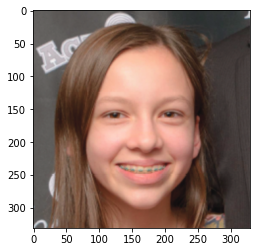

In [26]:
look_img_path('demo/src.png')

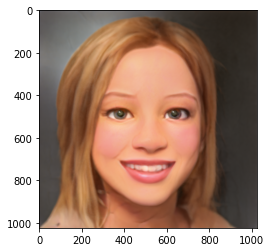

In [ ]:
look_img_path('demo/src_output1.png')

In [ ]:
# demo目录下，输入src.png，生成toonify风格的迁移图像，保存在--save-path参数指定的目录下
# 风格："toonify", "oil", "sketch", "cartoon", "comic", "bitimoji"
!python demo/quick_try.py demo/zihao.png --style toonify --save-path demo/zihao_output1.png

/usr/local/lib/python3.7/dist-packages/scipy/fft/__init__.py:97: DeprecationWarning: The module numpy.dual is deprecated.  Instead of using dual, use the functions directly from numpy or scipy.
  from numpy.dual import register_func
/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/local/lib/python3.7/dist-packages/scipy/special/orthogonal.py:81: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
 

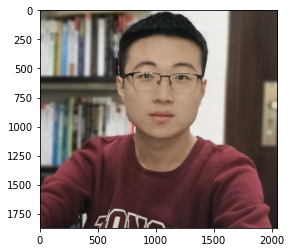

In [ ]:
look_img_path('demo/zihao.png')

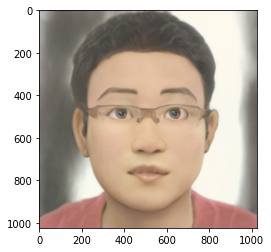

In [ ]:
look_img_path('demo/zihao_output1.png')

## 调节参数，更改风格迁移效果

swap_layer为0-10之间的整数。越大，越接近原图。越小，风格化程度越高。

/usr/local/lib/python3.7/dist-packages/scipy/fft/__init__.py:97: DeprecationWarning: The module numpy.dual is deprecated.  Instead of using dual, use the functions directly from numpy or scipy.
  from numpy.dual import register_func
/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/local/lib/python3.7/dist-packages/scipy/special/orthogonal.py:81: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
 

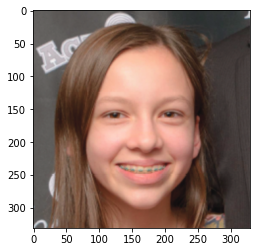

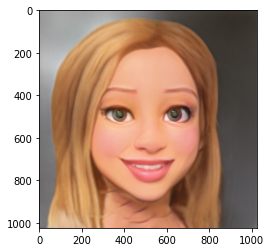

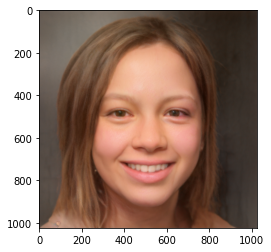

In [ ]:
!python demo/quick_try.py demo/src.png --style toonify --save-path demo/src_output2.png --swap-layer 1
!python demo/quick_try.py demo/src.png --style toonify --save-path demo/src_output3.png --swap-layer 7
look_img_path('demo/src.png')
look_img_path('demo/src_output2.png')
look_img_path('demo/src_output3.png')

/usr/local/lib/python3.7/dist-packages/scipy/fft/__init__.py:97: DeprecationWarning: The module numpy.dual is deprecated.  Instead of using dual, use the functions directly from numpy or scipy.
  from numpy.dual import register_func
/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/local/lib/python3.7/dist-packages/scipy/special/orthogonal.py:81: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
 

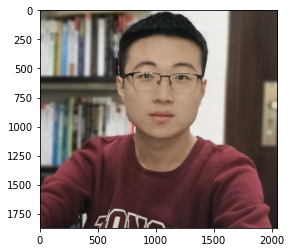

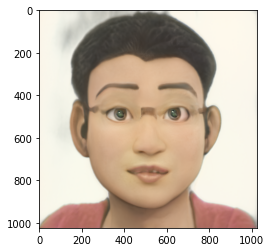

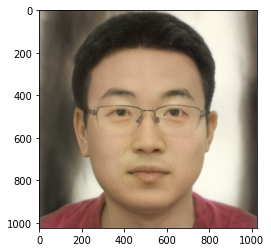

In [ ]:
!python demo/quick_try.py demo/zihao.png --style toonify --save-path demo/zihao_output2.png --swap-layer 1
!python demo/quick_try.py demo/zihao.png --style toonify --save-path demo/zihao_output3.png --swap-layer 7
look_img_path('demo/zihao.png')
look_img_path('demo/zihao_output2.png')
look_img_path('demo/zihao_output3.png')

# 在自己的数据集上训练人脸风格迁移模型

## 下载自己的动漫头像数据集

>几个开源的艺术动漫风格人脸数据集：

韩国动漫头像数据集：https://github.com/bryandlee/naver-webtoon-faces

Kaggle高清动漫头像数据集：https://www.kaggle.com/subinium/highresolution-anime-face-dataset-512x512

日本浮世绘头像数据集：https://www.justinpinkney.com/ukiyoe-dataset/

日本浮世绘分角色头像数据集：https://github.com/rois-codh/kaokore

webtoon-172韩漫数据集：https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com:443/20220223-facestylor/webtoon-172.zip


In [ ]:
# 以webtoon韩漫数据集为例，将数据集下载至data目录下，解压
%cd data
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com:443/20220223-facestylor/webtoon-172.zip
!unzip webtoon-172.zip
%cd ..

/content/MMGEN-FaceStylor/data
--2022-02-25 07:36:55--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220223-facestylor/webtoon-172.zip
Resolving zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)... 121.36.235.132
Connecting to zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)|121.36.235.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18545111 (18M) [application/zip]
Saving to: ‘webtoon-172.zip’

webtoon-172.zip     100%[===================>]  17.69M  30.5MB/s    in 0.6s    

2022-02-25 07:36:56 (30.5 MB/s) - ‘webtoon-172.zip’ saved [18545111/18545111]

Archive:  webtoon-172.zip
   creating: webtoon-172/
  inflating: __MACOSX/._webtoon-172  
  inflating: webtoon-172/out382.png  
  inflating: __MACOSX/webtoon-172/._out382.png  
  inflating: webtoon-172/out355.png  
  inflating: __MACOSX/webtoon-172/._out355.png  
  inflating: webtoon-172/out1097.png  



打开configs目录下对应的config文件，将imgs_root修改为新数据集路径，例如`imgs_root = 'data/webtoon-172'`，保存。

## 在自己的数据集上训练人像风格迁移模型(运行1小时左右)

In [ ]:
!bash tools/dist_train.sh configs/agilegan/agile_transfer_photo2cartoon256x256_zplus_lpips0.5_freezeD5_ada_bs4x2_lr_2e-3_1600iter.py 1 --work-dir ./work_dirs/experiments/experiments_name

/usr/local/lib/python3.7/dist-packages/scipy/fft/__init__.py:97: DeprecationWarning: The module numpy.dual is deprecated.  Instead of using dual, use the functions directly from numpy or scipy.
  from numpy.dual import register_func
/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/local/lib/python3.7/dist-packages/scipy/special/orthogonal.py:81: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
 

## 用训练得到的模型进行人像风格迁移

在./work_dirs/experiments/experiments_name目录中

training_samples保存了训练过程中达到不同迭代次数时的训练效果

ckpt/experiments_name保存了训练过程中达到不同迭代次数时的模型权重文件

In [ ]:
# 可以用./work_dirs/experiments/experiments_name/ckpt/experiments_name目录下的权重文件
# 也可以直接下载子豪兄在webtoon-172数据集上预训练好的模型权重和config文件
%cd work_dirs/pre-trained
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220223-facestylor/webtoon-zihao.pth
%cd ../../

%cd demo
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220223-facestylor/quick_try_webtoon.py
%cd ..

/content/MMGEN-FaceStylor/work_dirs/pre-trained
--2022-02-25 07:37:26--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220223-facestylor/webtoon-zihao.pth
Resolving zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)... 121.36.235.132
Connecting to zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)|121.36.235.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1004513198 (958M) [application/octet-stream]
Saving to: ‘webtoon-zihao.pth’

webtoon-zihao.pth   100%[===================>] 957.98M  57.8MB/s    in 16s     

2022-02-25 07:37:42 (60.4 MB/s) - ‘webtoon-zihao.pth’ saved [1004513198/1004513198]

/content/MMGEN-FaceStylor
/content/MMGEN-FaceStylor/demo
--2022-02-25 07:37:42--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220223-facestylor/quick_try_webtoon.py
Resolving zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-ea

用训练得到的.pth模型和新设置的quick_try脚本运行人像风格迁移

/usr/local/lib/python3.7/dist-packages/scipy/fft/__init__.py:97: DeprecationWarning: The module numpy.dual is deprecated.  Instead of using dual, use the functions directly from numpy or scipy.
  from numpy.dual import register_func
/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/local/lib/python3.7/dist-packages/scipy/special/orthogonal.py:81: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
 

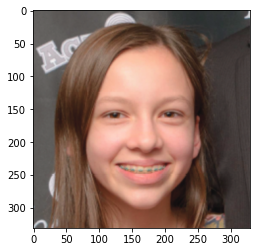

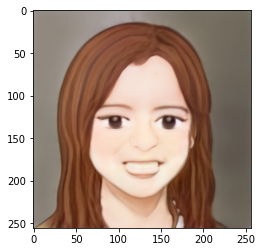

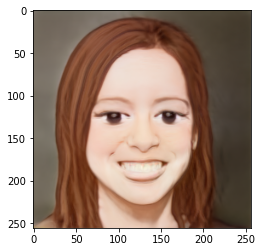

In [ ]:
!python demo/quick_try_webtoon.py demo/src.png --style webtoon --save-path demo/src_output4.png --swap-layer 1
!python demo/quick_try_webtoon.py demo/src.png --style webtoon --save-path demo/src_output5.png --swap-layer 3
look_img_path('demo/src.png')
look_img_path('demo/src_output4.png')
look_img_path('demo/src_output5.png')

/usr/local/lib/python3.7/dist-packages/scipy/fft/__init__.py:97: DeprecationWarning: The module numpy.dual is deprecated.  Instead of using dual, use the functions directly from numpy or scipy.
  from numpy.dual import register_func
/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/local/lib/python3.7/dist-packages/scipy/special/orthogonal.py:81: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
 

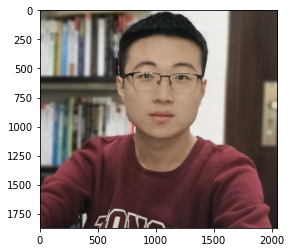

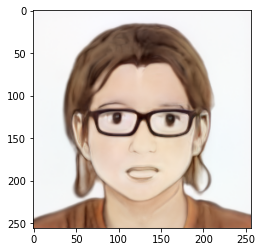

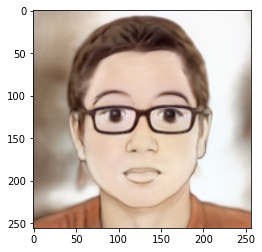

In [ ]:
!python demo/quick_try_webtoon.py demo/zihao.png --style webtoon --save-path demo/zihao_output4.png --swap-layer 1
!python demo/quick_try_webtoon.py demo/zihao.png --style webtoon --save-path demo/zihao_output5.png --swap-layer 3
look_img_path('demo/zihao.png')
look_img_path('demo/zihao_output4.png')
look_img_path('demo/zihao_output5.png')

# 扩展阅读

Face Stylor在线网页demo：https://app.openmmlab.com/facestylor

Face Stylor主页：https://github.com/open-mmlab/MMGEN-FaceStylor

MMgeneration主页：https://github.com/open-mmlab/mmgeneration

OpenMMLab主页：https://openmmlab.com/

世界名画风格迁移教程：https://www.bilibili.com/video/BV1i64y1B72P

pix2pix简笔画变真图demo：https://affinelayer.com/pixsrv/

> 论文

Toonify：

https://toonify.photos/

https://github.com/justinpinkney/toonify

StyleGAN2: https://arxiv.org/abs/1912.04958

AgileGAN： 

https://guoxiansong.github.io/homepage/paper/AgileGAN.pdf

GAN inversion：https://arxiv.org/abs/2008.00951

适应性增广：https://arxiv.org/abs/2006.06676

冻结层： https://arxiv.org/abs/2002.10964

layerSwap: https://arxiv.org/abs/2010.05334

DNI: https://arxiv.org/abs/1811.10515

> 参考代码

https://github.com/open-mmlab/mmcv

https://github.com/GuoxianSong/AgileGAN

https://github.com/flyingbread-elon/AgileGAN

https://github.com/eladrich/pixel2style2pixel

https://github.com/happy-jihye/Cartoon-StyleGAN

https://github.com/NVlabs/stylegan2-ada-pytorch

https://github.com/sangwoomo/FreezeD

https://github.com/bryandlee/FreezeG

https://github.com/justinpinkney/toonify

【开源AI算法体系OpenMMLab内推】

OpenMMLab是一整套由中国开发者主导共建，有国际影响力的人工智能计算机视觉开源算法体系，帮你一站式解决数据标注、模型构建、训练、评估、部署、推理等人工智能领域“老大难”问题。将最前沿的计算机视觉黑科技，赋予给各行各业的每一个普通人。

已有算法库包括：图像处理、图像识别分类、目标检测、目标追踪、图像分割、关键点检测（人体姿态估计）、人体动作识别、3D目标检测、3D人体姿态重构、图像生成、OCR、图像修复、超分辨率、模型压缩、模型部署、知识蒸馏、自监督、少样本、光流。

我们热忱欢迎您加入OpenMMLab社群，贡献代码、文档、翻译、教程，结识各路大佬。也欢迎和我们成为同事，一起用有温度的AI，让世界充满爱。

简历发hr@openmmlab.com，命名格式：张三-岗位（前/后端/测试/算法/运营/产品）-身份（实习/校招/社招）-同济子豪兄内推。

详细岗位介绍：https://mp.weixin.qq.com/s/Dv03heU4G-Db6b0qgb7X_A

扫图最后二维码加喵喵小助手，回复同济子豪兄，查看内推进度。